# Kaggle 入门赛：泰坦尼克号之灾练习（1）

参考资料：[Kaggle Titanic 生存预测(Top1.4%)完整代码分享](https://zhuanlan.zhihu.com/p/33733586)

本文在探索性数据分析的时候，大量使用 seaborn 绘制 bar 图：

```python
sns.barplot(x="Sex", y="Survived", data=train, palette='Set3')
```

In [39]:
import pandas as pd
import numpy as np

train = pd.read_csv('../input/train.csv', dtype={"Age": np.float64})
test = pd.read_csv('../input/test.csv', dtype={"Age": np.float64})

In [40]:
PassengerId = test['PassengerId']
all_data = pd.concat([train, test], ignore_index=True, sort=False)

## EDA



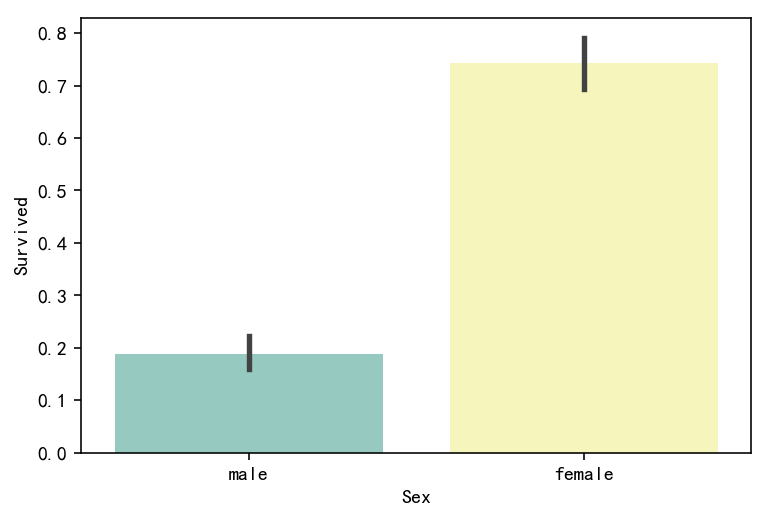

In [41]:
import seaborn as sns

# train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True)
# train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True) 

sns.barplot(x="Sex", y="Survived", data=train, palette='Set3')
plt.show()

性别：女性幸存率远高于男性。

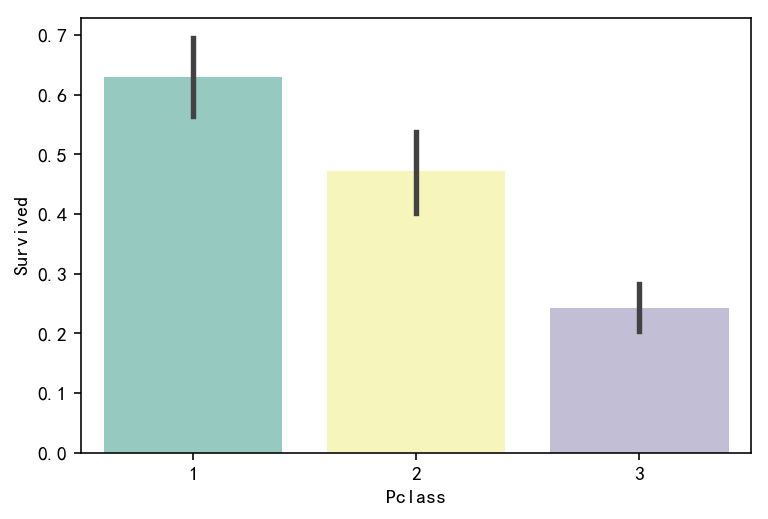

In [42]:
# train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)
# train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)
# train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)

sns.barplot(x="Pclass", y="Survived", data=train, palette='Set3')
plt.show()

Pclass 乘客社会等级越高，幸存率越高。

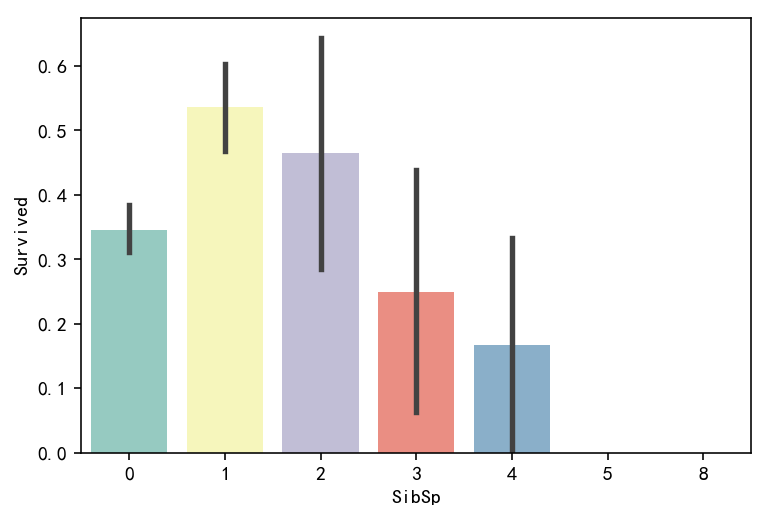

In [43]:
sns.barplot(x="SibSp", y="Survived", data=train, palette='Set3')
plt.show()

SibSp：配偶及兄弟姐妹数适中的乘客幸存率更高。

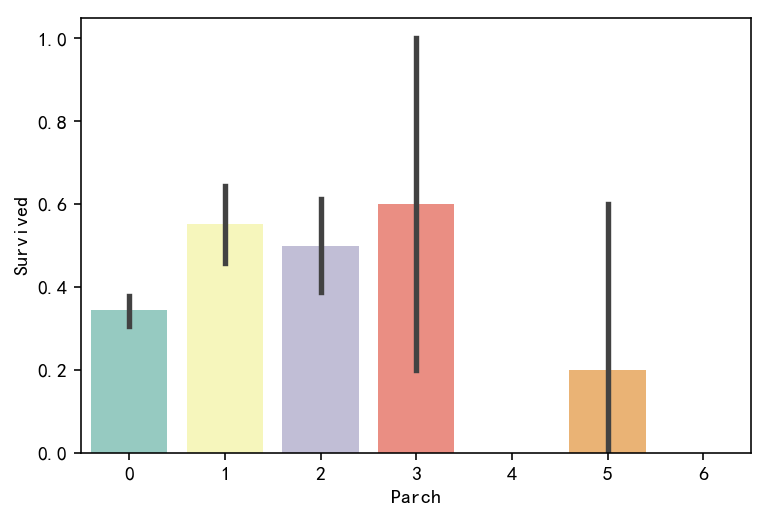

In [44]:
sns.barplot(x="Parch", y="Survived", data=train, palette='Set3')
plt.show()

Parch：父母与子女数适中的乘客幸存率更高。

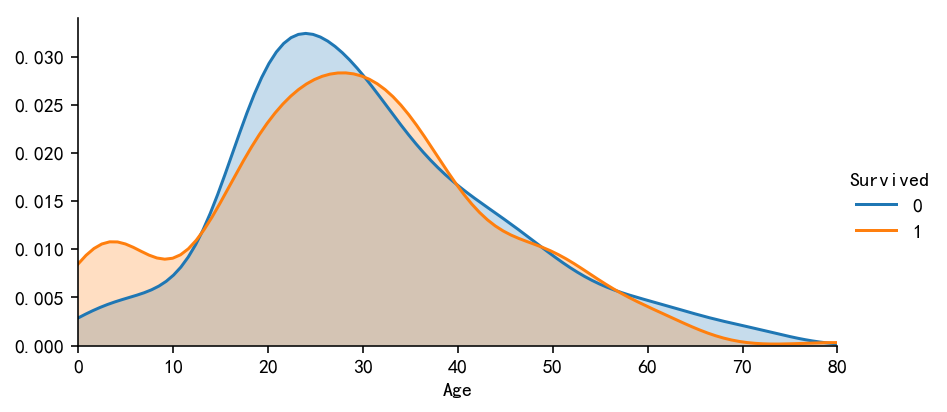

In [45]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

Age：未成年人幸存率高于成年人。

### Fare：支出船票费越高幸存率越高



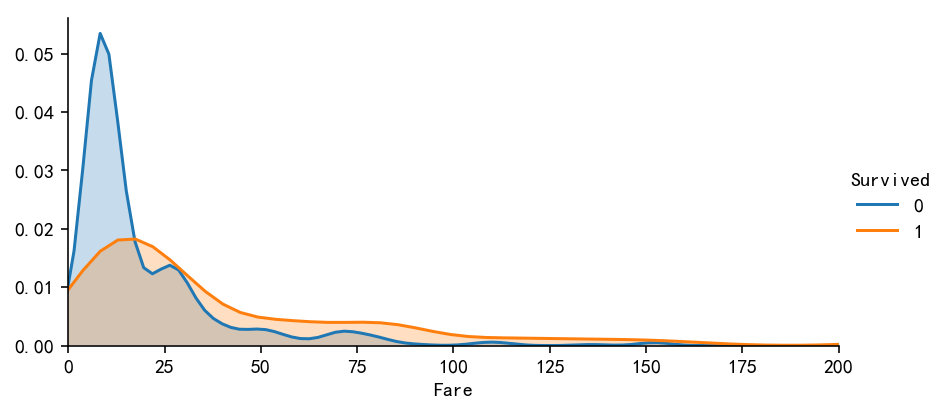

In [46]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend()
plt.show()

### Title （我们从 Name 中抽取的特征）：不同称呼的乘客幸存率不同

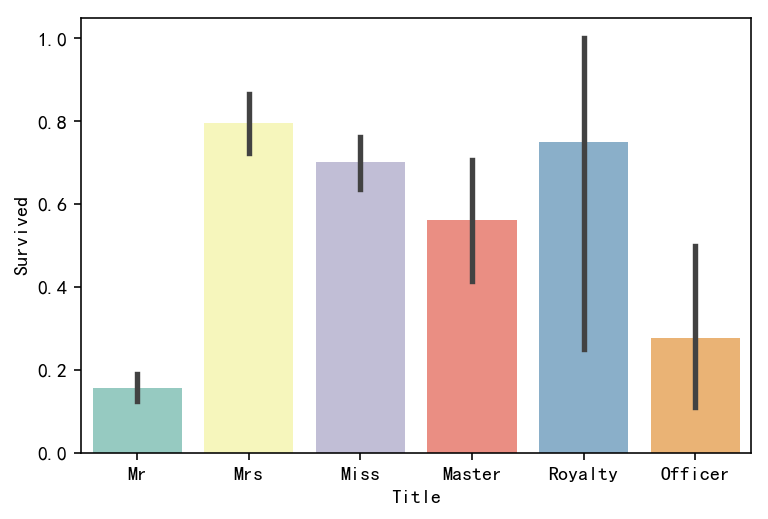

In [47]:
all_data['Title'] = all_data['Name'].apply(
    lambda x: x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(
    dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(
    dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master', 'Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data, palette='Set3')
plt.show()

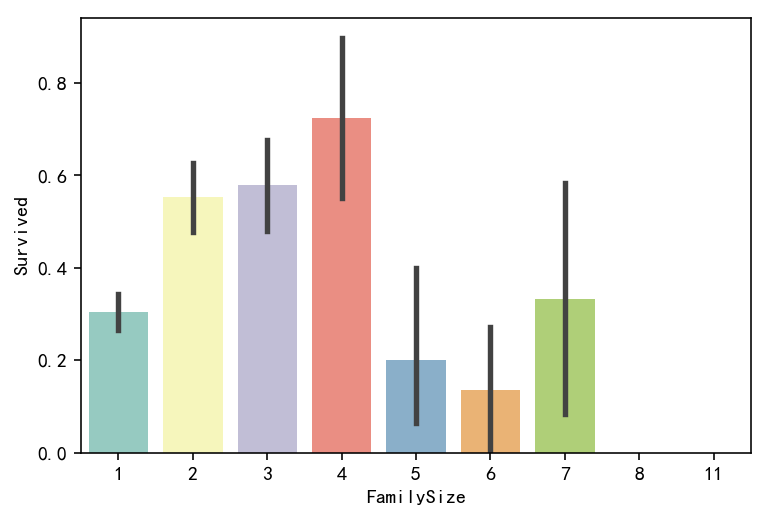

In [15]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x="FamilySize", y="Survived", data=all_data, palette='Set3')
plt.show()

FamilyLabel（从父母和兄弟人数这两个特征抽取的特征）：家庭人数为 2 到 4 的乘客幸存率较高。

按生存率把 FamilySize 分为三类，构成 FamilyLabel 特征。

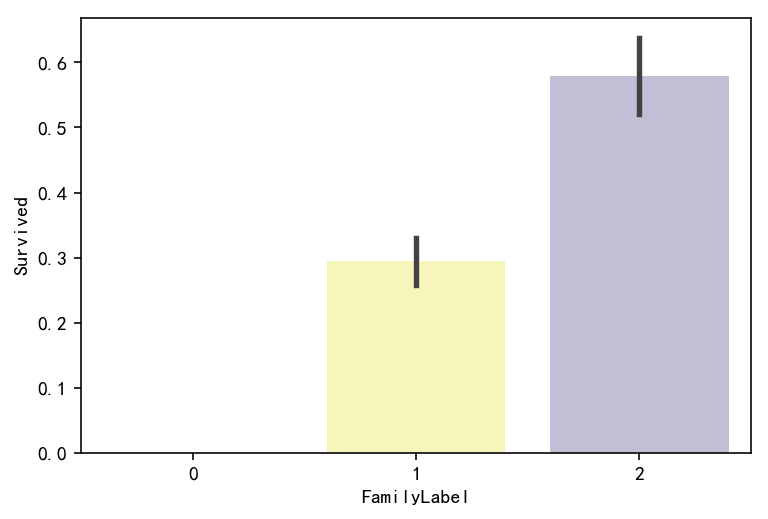

In [16]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0


all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data, palette='Set3')
plt.show()

Deck Feature（从 Cabin 中抽取的特征）：不同甲板的乘客幸存率不同。

新增 Deck 特征，先把 Cabin 空缺值填充为 'Unknown'，再提取 Cabin 中的首字母构成乘客的甲板号。

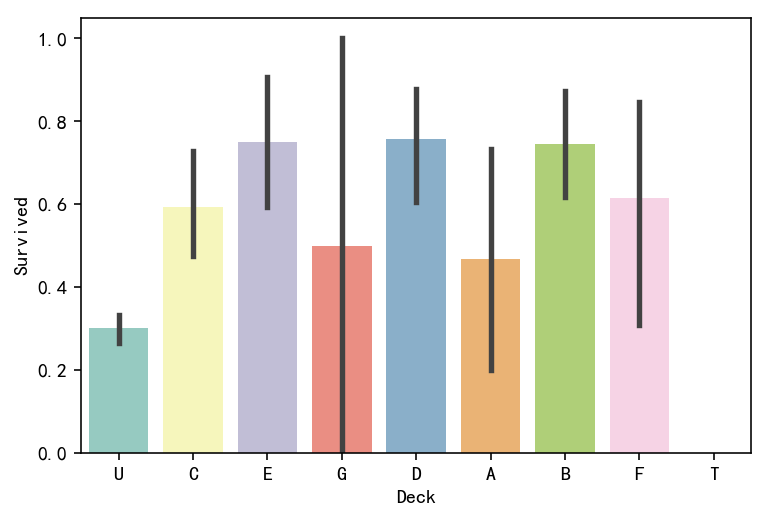

In [17]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data, palette='Set3')
plt.show()

### TicketGroup ：与 2 至 4 人共票号的乘客幸存率较高

新增 TicketGroup 特征，统计每个乘客的共票号数。

In [18]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
Ticket_Count

{'110152': 3,
 '110413': 3,
 '110465': 2,
 '110469': 1,
 '110489': 1,
 '110564': 1,
 '110813': 2,
 '111163': 1,
 '111240': 1,
 '111320': 1,
 '111361': 2,
 '111369': 1,
 '111426': 1,
 '111427': 1,
 '111428': 1,
 '112050': 1,
 '112051': 1,
 '112052': 1,
 '112053': 1,
 '112058': 2,
 '112059': 1,
 '112277': 1,
 '112377': 1,
 '112378': 2,
 '112379': 1,
 '112901': 1,
 '113028': 1,
 '113038': 1,
 '113043': 1,
 '113044': 1,
 '113050': 1,
 '113051': 1,
 '113054': 1,
 '113055': 1,
 '113056': 1,
 '113059': 2,
 '113501': 1,
 '113503': 5,
 '113505': 2,
 '113509': 2,
 '113510': 1,
 '113514': 1,
 '113572': 2,
 '113760': 4,
 '113767': 1,
 '113773': 2,
 '113776': 2,
 '113778': 1,
 '113780': 1,
 '113781': 6,
 '113783': 1,
 '113784': 1,
 '113786': 1,
 '113787': 1,
 '113788': 1,
 '113789': 2,
 '113790': 1,
 '113791': 1,
 '113792': 1,
 '113794': 1,
 '113795': 1,
 '113796': 2,
 '113798': 2,
 '113800': 1,
 '113801': 1,
 '113803': 2,
 '113804': 1,
 '113806': 2,
 '113807': 1,
 '11668': 2,
 '11751': 2,
 '11752'

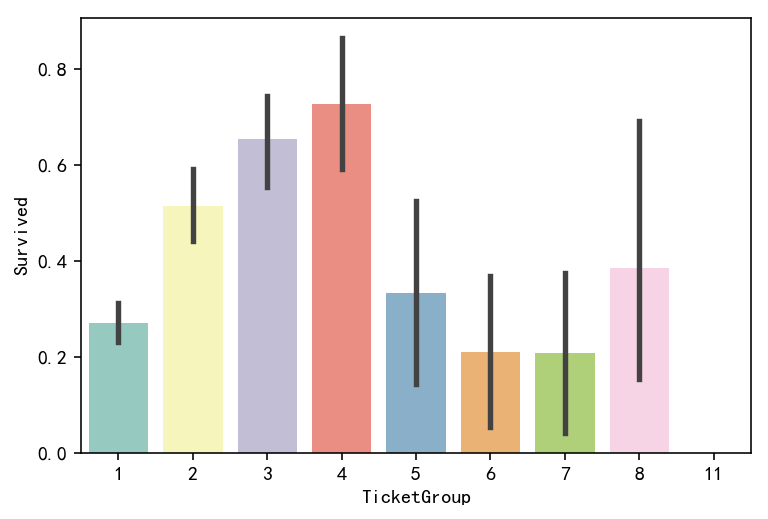

In [19]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x: Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')
plt.show()

按生存率把 `TicketGroup` 分为三类。

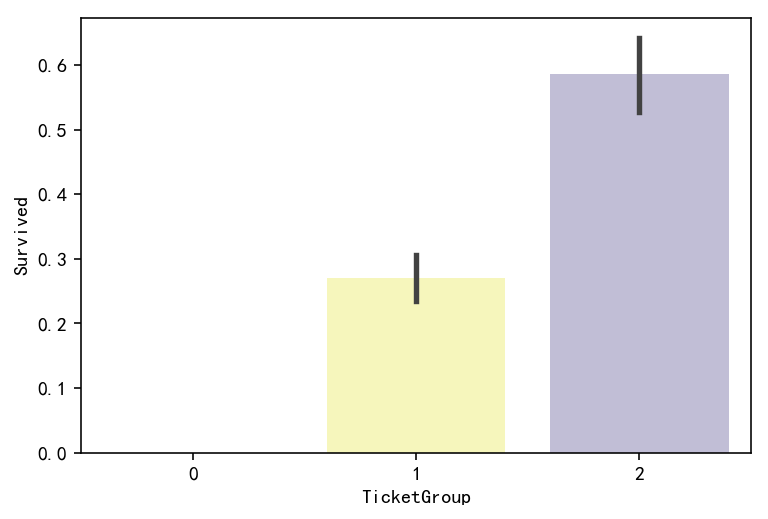

In [20]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0


all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')
plt.show()

## 数据清洗

### 缺失值填充

#### 年龄：用随机森林预测缺失的年龄


Age 缺失量为 263，缺失量较大，用 Sex、Title、Pclass 三个特征构建随机森林模型，填充年龄缺失值。

In [21]:
age_df = all_data[['Age', 'Pclass', 'Sex', 'Title']]
age_df = pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[(all_data.Age.isnull()), 'Age'] = predictedAges

#### Embarked

Embarked 缺失量为 2 ，缺失 Embarked 信息的乘客的 Pclass 均为 1 ，且 Fare 均为 80 ，因为 Embarked 为 C 且 Pclass 为 1 的乘客的 Fare 中位数为 80 ，所以缺失值填充为 C。


In [24]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,1,B,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,1,B,2


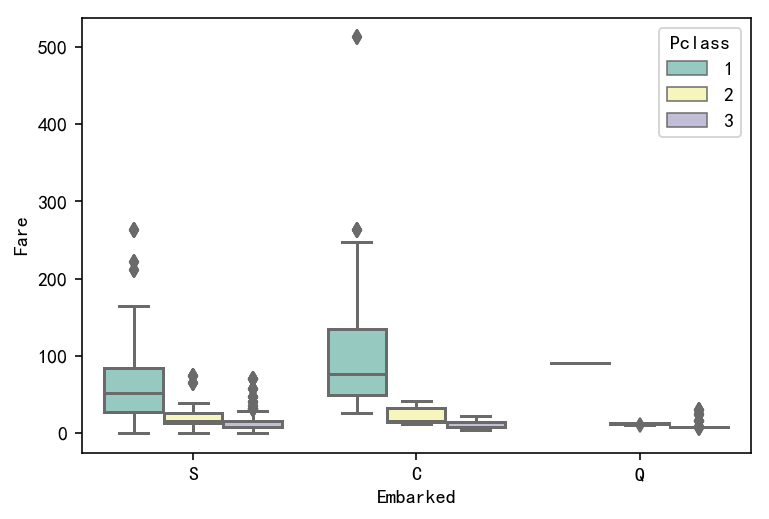

In [25]:
sns.boxplot(
    x="Embarked", y="Fare", hue="Pclass", data=all_data, palette="Set3")
plt.show()

In [26]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

#### Fare 

Fare 缺失量为 1 ，缺失 Fare 信息的乘客的 Embarked 为 S，Pclass 为 3 ，所以用 Embarked 为 S ，Pclass 为 3 的乘客的 Fare 中位数填充。

In [27]:
all_data[all_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,Mr,1,1,U,1


In [28]:
fare = all_data[(all_data['Embarked'] == "S")
                & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

到此为止，我们把缺失值都填补好了。

---

### 同组识别

把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。

In [50]:
all_data['Surname'] = all_data['Name'].apply(lambda x: x.split(',')[0].strip())
all_data[['Name', 'Surname']].head()

,Name,Surname
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen


In [51]:
Surname_Count = dict(all_data['Surname'].value_counts())
Surname_Count

{'Abbing': 1,
 'Abbott': 3,
 'Abelseth': 2,
 'Abelson': 2,
 'Abrahamsson': 1,
 'Abrahim': 1,
 'Adahl': 1,
 'Adams': 1,
 'Ahlin': 1,
 'Aks': 2,
 'Albimona': 1,
 'Aldworth': 1,
 'Alexander': 1,
 'Alhomaki': 1,
 'Ali': 2,
 'Allen': 2,
 'Allison': 4,
 'Allum': 1,
 'Andersen': 1,
 'Andersen-Jensen': 1,
 'Anderson': 1,
 'Andersson': 11,
 'Andreasson': 1,
 'Andrew': 2,
 'Andrews': 2,
 'Angheloff': 1,
 'Angle': 2,
 'Appleton': 1,
 'Arnold-Franchi': 2,
 'Aronsson': 1,
 'Artagaveytia': 1,
 'Ashby': 1,
 'Asim': 1,
 'Asplund': 8,
 'Assaf': 1,
 'Assaf Khalil': 1,
 'Assam': 1,
 'Astor': 2,
 'Attalah': 2,
 'Aubart': 1,
 'Augustsson': 1,
 'Ayoub': 1,
 'Baccos': 1,
 'Backstrom': 2,
 'Baclini': 4,
 'Badman': 1,
 'Badt': 1,
 'Bailey': 1,
 'Baimbrigge': 1,
 'Balkic': 1,
 'Ball': 1,
 'Banfield': 1,
 'Barah': 1,
 'Barbara': 2,
 'Barber': 1,
 'Barkworth': 1,
 'Barry': 1,
 'Barton': 1,
 'Bateman': 1,
 'Baumann': 1,
 'Baxter': 2,
 'Bazzani': 1,
 'Beane': 2,
 'Beattie': 1,
 'Beauchamp': 1,
 'Beavan': 1,
 'Becke

In [52]:
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x: Surname_Count[x])
all_data['FamilyGroup'] 

0        2
1        2
2        1
3        2
4        2
5        3
6        2
7        5
8        6
9        2
10       3
11       2
12       1
13      11
14       1
15       1
16       6
17       5
18       4
19       1
20       1
21       1
22       2
23       1
24       5
25       8
26       1
27       6
28       1
29       1
        ..
1279     2
1280     5
1281     1
1282     2
1283     3
1284     1
1285     3
1286     6
1287     1
1288     2
1289     1
1290     1
1291     2
1292     2
1293     2
1294     2
1295     3
1296     1
1297     4
1298     3
1299     1
1300     3
1301     1
1302     3
1303     1
1304     1
1305     1
1306     1
1307     4
1308     3
Name: FamilyGroup, Length: 1309, dtype: int64

In [53]:
Female_Child_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & ((all_data['Age'] <= 12) | (all_data['Sex'] == 'female'))]
Male_Adult_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & (all_data['Age'] > 12) & (all_data['Sex'] == 'male')]

<span class="burk">发现绝大部分女性和儿童组的平均存活率都为 1 或 0 ，即同组的女性和儿童要么全部幸存，要么全部遇难。</span>



In [59]:
Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts()

1.000000    114
0.000000     31
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [55]:
Female_Child = pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child

,Survived
1.000000,114
0.000000,31
0.750000,2
0.333333,1
0.142857,1


In [56]:
Female_Child.columns = ['GroupCount']
Female_Child

,GroupCount
1.000000,114
0.000000,31
0.750000,2
0.333333,1
0.142857,1


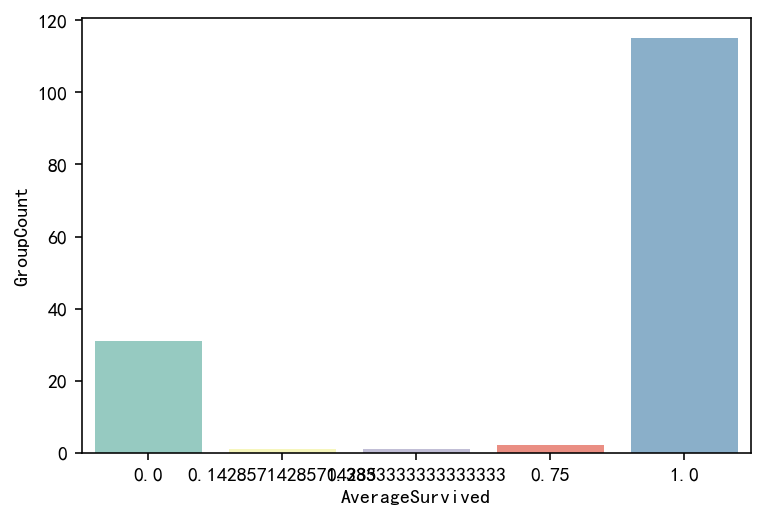

In [31]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"], palette='Set3').set_xlabel('AverageSurvived')
plt.show()

绝大部分成年男性组的平均存活率也为 1 或 0 。

In [32]:
Male_Adult = pd.DataFrame(
    Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns = ['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


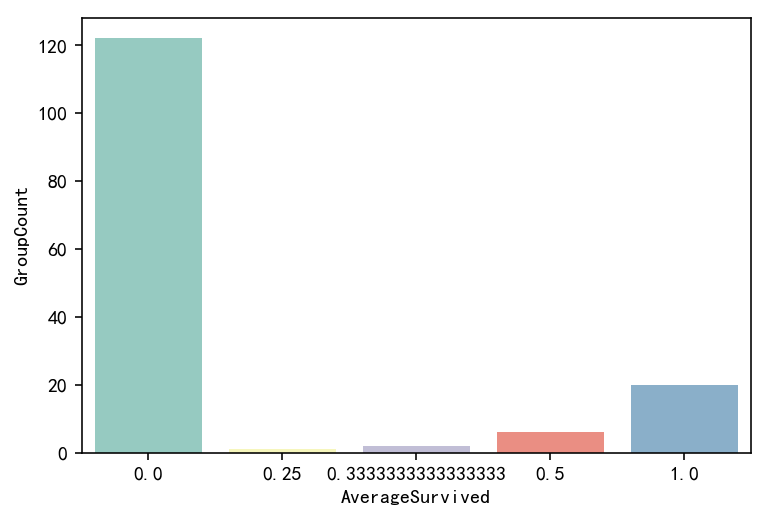

In [33]:
sns.barplot(
    x=Male_Adult.index, y=Male_Adult['GroupCount'],
    palette='Set3').set_xlabel('AverageSurvived')
plt.show()


<span class="burk">因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。把女性和儿童组中幸存率为 0 的组设置为遇难组，把成年男性组中存活率为 1 的设置为幸存组，推测处于遇难组的女性和儿童幸存的可能性较低，处于幸存组的成年男性幸存的可能性较高。</span>

In [60]:
Female_Child_Group = Female_Child_Group.groupby('Surname')['Survived'].mean()
Female_Child_Group

Surname
Abbott            1.000000
Abelseth               NaN
Abelson           1.000000
Aks               1.000000
Allen             1.000000
Allison           0.333333
Andersson         0.142857
Andrews           1.000000
Angle             1.000000
Arnold-Franchi    0.000000
Asplund           0.750000
Astor             1.000000
Attalah           0.000000
Backstrom         1.000000
Baclini           1.000000
Barbara           0.000000
Baxter            1.000000
Beane             1.000000
Becker            1.000000
Beckwith          1.000000
Bishop            1.000000
Bonnell           1.000000
Boulos            0.000000
Bourke            0.000000
Bowen                  NaN
Bradley                NaN
Brown             1.000000
Bryhl                  NaN
Buckley                NaN
Burns             1.000000
                    ...   
Spencer           1.000000
Stanley           1.000000
Stengel                NaN
Straus                 NaN
Strom             0.000000
Taussig           1.

In [61]:
Dead_List = set(
    Female_Child_Group[Female_Child_Group.apply(lambda x: x == 0)].index)
print(Dead_List)

{'Canavan', 'Danbom', 'Ilmakangas', 'Jussila', 'Olsson', 'Vander Planke', 'Palsson', 'Lobb', 'Rosblom', 'Robins', 'Van Impe', 'Boulos', 'Arnold-Franchi', 'Cacic', 'Attalah', 'Turpin', 'Goodwin', 'Panula', 'Zabour', 'Lahtinen', 'Johnston', 'Barbara', 'Rice', 'Ford', 'Lefebre', 'Strom', 'Bourke', 'Sage', 'Skoog', 'Caram', 'Oreskovic'}


In [62]:
Male_Adult_List = Male_Adult_Group.groupby('Surname')['Survived'].mean()
Male_Adult_List

Surname
Abbott            0.0
Abelseth          NaN
Abelson           0.0
Ali               0.0
Allen             0.0
Allison           NaN
Andersson         0.5
Andrew            0.0
Andrews           0.0
Angle             NaN
Arnold-Franchi    0.0
Asplund           NaN
Astor             NaN
Attalah           0.0
Backstrom         0.0
Baxter            0.0
Beane             1.0
Beckwith          1.0
Betros            0.0
Bishop            1.0
Bourke            0.0
Bowen             0.0
Braund            0.0
Brown             0.0
Bryhl             0.0
Buckley           NaN
Cacic             0.0
Caldwell          NaN
Calic             0.0
Canavan           NaN
                 ... 
Skoog             0.0
Smith             0.0
Snyder            NaN
Spedden           NaN
Spencer           NaN
Stanley           0.0
Stengel           NaN
Straus            NaN
Svensson          0.0
Taussig           0.0
Taylor            1.0
Thayer            0.5
Turpin            0.0
Van Impe          0.0
Va

In [63]:
Survived_List = set(
    Male_Adult_List[Male_Adult_List.apply(lambda x: x == 1)].index)

print(Survived_List)

{'Beane', 'Jonsson', 'Taylor', 'Beckwith', 'Dick', 'Hoyt', 'Flynn', 'Chambers', 'Goldenberg', 'Frauenthal', 'Greenfield', 'Bishop', 'Kimball', 'Nakid', 'Cardeza', 'Duff Gordon', 'Frolicher-Stehli', 'Daly', 'Jussila', 'Harder'}


为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的 Age、Title、Sex 进行惩罚修改。

In [35]:
train = all_data.loc[all_data['Survived'].notnull()]
test = all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x: x in Dead_List)), 'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x: x in Dead_List)), 'Age'] = 60
test.loc[(test['Surname'].apply(lambda x: x in Dead_List)), 'Title'] = 'Mr'
test.loc[(
    test['Surname'].apply(lambda x: x in Survived_List)), 'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x: x in Survived_List)), 'Age'] = 5
test.loc[(
    test['Surname'].apply(lambda x: x in Survived_List)), 'Title'] = 'Miss'

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 特征转换

选取特征，转换为数值变量，划分训练集和测试集。

In [36]:
all_data = pd.concat([train, test])
all_data = all_data[[
    'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
    'FamilyLabel', 'Deck', 'TicketGroup'
]]
all_data = pd.get_dummies(all_data)
train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()].drop('Survived', axis=1)
X = train.as_matrix()[:, 1:]
y = train.as_matrix()[:, 0]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


## 建模

### 网格搜索，得到最佳超参数

用网格搜索自动化选取最优参数，事实上我用网格搜索得到的最优参数是 n_estimators=28，max_depth=6。但是参考另一篇 Kernel 把参数改为n_estimators=26，max_depth=6 之后交叉验证分数和 kaggle 评分都有略微提升。

In [65]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest

pipe = Pipeline([('select', SelectKBest(k=20)), ('classify',
                                                 RandomForestClassifier(
                                                     random_state=10,
                                                     max_features='sqrt'))])

In [67]:
param_test = {
    'classify__n_estimators': list(range(20, 50, 2)),
    'classify__max_depth': list(range(3, 60, 3))
}

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gsearch = GridSearchCV(
    estimator=pipe, param_grid=param_test, scoring='roc_auc', cv=10)
gsearch.fit(X, y)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectKBest(k=20, score_func=<function f_classif at 0x125cb2840>)), ('classify', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_spl...rs='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classify__n_estimators': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48], 'classify__max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [70]:
gsearch.best_params_

{'classify__max_depth': 6, 'classify__n_estimators': 42}

In [71]:
gsearch.best_score_

0.8810963508395343

### 模型训练

In [75]:
from sklearn.pipeline import make_pipeline

select = SelectKBest(k=20)
clf = RandomForestClassifier(
    random_state=10,
    warm_start=True,
    n_estimators=26,
    max_depth=6,
    max_features='sqrt')
pipeline = Pipeline([('select', select), ('clf', clf)])
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('select', SelectKBest(k=20, score_func=<function f_classif at 0x125cb2840>)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,...imators=26, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

### 交叉验证

In [77]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(pipeline, X, y, cv=10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score),
                                                np.std(cv_score)))

CV Score : Mean - 0.8451402 | Std - 0.03276752 


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## 预测

In [81]:
X.shape


(891, 25)

In [82]:
test.shape

(418, 11)

In [79]:
predictions = pipeline.predict(test)

ValueError: X has a different shape than during fitting.

In [78]:

submission = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": predictions.astype(np.int32)
})
submission.to_csv("../output/submission.csv", index=False)

ValueError: X has a different shape than during fitting.

![](提交结果.jpg)

![](提交排名.jpg)